In [2]:
#importar biblioteca

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

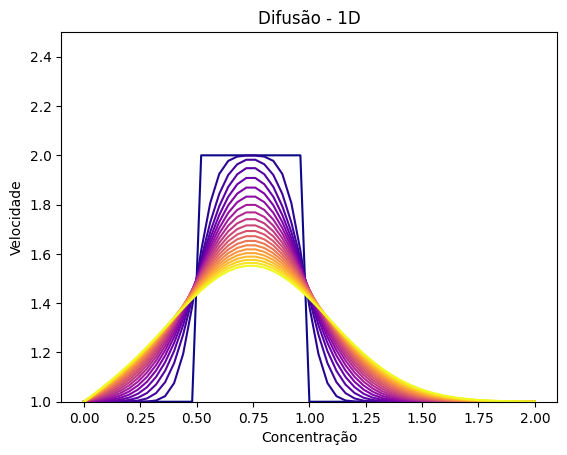

In [4]:
def difusao(ti, xi, tmax, xmax, D):

    dt = tmax/(ti-1)
    dx = xmax/(xi-1)

    u = np.zeros((xi,ti))
    x = np.zeros(xi)

    
# condicoes de contorno
    u[0,:] = u[xi-1,:] = 1

    
# condicoes iniciais
    for i in range(1,xi-1):
        if(i > (xi-1)/4 and i < (xi-1)/2):
            u[i,0] = 2
        else:
             u[i,0] = 1

    for n in range(0,ti-1):
        for i in range(1,xi-1):
            u[i,n+1] = u[i,n] + D*(dt/dx**2.0)*(u[i+1,n]-2.0*u[i,n]+u[i-1,n])

    for i in range(0,xi):
        x[i] = i*dx

    return u, x


def plot_difusao(u,x,ti,title):
  
    plt.figure()
    colour=iter(cm.plasma(np.linspace(0,10,ti)))
    for i in range(0,ti,10):
      c=next(colour)
      plt.plot(x,u[:,i],c=c)
    plt.xlabel('Concentração')
    plt.ylabel('Velocidade')
    plt.ylim([1,2.5])
    plt.title(title)
    plt.show()

u,x = difusao(201, 51, 0.5, 2.0, 0.1)
plot_difusao(u,x,201,'Difusão - 1D')